> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [3]:
# --- Naive Bayes: Try It Yourself — Part 2 ---
# Runs two experiments:
# (A) Use all boolean features with test_size=0.2
# (B) Remove 'celebrity' and 'funny' and keep test_size=0.3

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

def run_nb_experiment(X, y, test_size=0.3, seed=42, label=""):
    """Train Bernoulli Naive Bayes and print metrics."""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=y
    )
    model = BernoulliNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print("="*80)
    print(f"Experiment: {label}")
    print(f"Features: {list(X.columns)}")
    print(f"test_size = {test_size}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print(f"Accuracy: {acc:.4f}")
    return acc

# -----------------------------------------------------------------------------------
# A) All logical (boolean) ad features, but change the split to test_size = 0.2
#    Assumes you already defined `logical_columns` and `youtube` earlier in the notebook.
# -----------------------------------------------------------------------------------
X_all = youtube[logical_columns]
y = youtube["high_engagement"].astype(int)

acc_A = run_nb_experiment(
    X=X_all,
    y=y,
    test_size=0.2,         # <-- required change
    seed=42,
    label="A) All features, test_size = 0.2"
)

# -----------------------------------------------------------------------------------
# B) Remove 'celebrity' and 'funny', keep the default test_size = 0.3
# -----------------------------------------------------------------------------------
reduced_cols = ['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']
X_reduced = youtube[reduced_cols]

acc_B = run_nb_experiment(
    X=X_reduced,
    y=y,
    test_size=0.3,         # default in the lab before Part 2
    seed=42,
    label="B) Without ['celebrity','funny'], test_size = 0.3"
)

# -----------------------------------------------------------------------------------
# Summary comparison
# -----------------------------------------------------------------------------------
print("="*80)
print("Summary:")
print(f"Accuracy A (all features, test_size=0.2): {acc_A:.4f}")
print(f"Accuracy B (no celebrity/funny, test_size=0.3): {acc_B:.4f}")
better = "A" if acc_A >= acc_B else "B"
print(f"Best performing setup: {better}")

Experiment: A) All features, test_size = 0.2
Features: ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
test_size = 0.2

Confusion Matrix:
[[14  9]
 [10 12]]

Classification Report:
              precision    recall  f1-score   support

           0      0.583     0.609     0.596        23
           1      0.571     0.545     0.558        22

    accuracy                          0.578        45
   macro avg      0.577     0.577     0.577        45
weighted avg      0.578     0.578     0.577        45

Accuracy: 0.5778
Experiment: B) Without ['celebrity','funny'], test_size = 0.3
Features: ['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']
test_size = 0.3

Confusion Matrix:
[[21 13]
 [17 17]]

Classification Report:
              precision    recall  f1-score   support

           0      0.553     0.618     0.583        34
           1      0.567     0.500     0.531        34

    accuracy                          0.559    

### ✍️ Your Response: 🔧
1. The model with test_size = 0.2 and all features performed best. Using a smaller test split leaves more data for training, which helps Naive Bayes learn more stable patterns. When removing celebrity and funny, accuracy dropped because those variables likely capture attention-grabbing content (humor and star power) that strongly correlates with engagement (likes/views).

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [5]:
# --- Support Vector Machine (SVM): Try It Yourself — Part 3 ---
# We'll test different kernels ('linear', 'poly') and C values (0.1, 1, 10)
# to observe how they affect the model’s performance.

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# -------------------------------------------------------------------
# Prepare the data
# -------------------------------------------------------------------
X_full = youtube[logical_columns + ['view_count']]
y = youtube['high_engagement'].astype(int)

# Scale features (important for SVM models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Function to train and evaluate an SVM with different kernels and C values
def run_svm_experiment(kernel_type='rbf', C_value=1.0):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    svm_model = SVC(kernel=kernel_type, C=C_value, gamma='scale')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("=" * 80)
    print(f"Kernel: {kernel_type},  C = {C_value}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
    print(f"Accuracy: {acc:.4f}")
    return acc

# -------------------------------------------------------------------
# Run experiments
# -------------------------------------------------------------------
results = {}
for kernel in ['linear', 'poly']:
    for C in [0.1, 1, 10]:
        acc = run_svm_experiment(kernel_type=kernel, C_value=C)
        results[(kernel, C)] = acc

# -------------------------------------------------------------------
# Print summary of accuracies
# -------------------------------------------------------------------
print("=" * 80)
print("Summary of Accuracy by Kernel and C value:")
for (kernel, C), acc in results.items():
    print(f"Kernel: {kernel:<6} |  C = {C:<4} |  Accuracy = {acc:.4f}")

best_combo = max(results, key=results.get)
print(f"\nBest model → Kernel: {best_combo[0]},  C = {best_combo[1]},  Accuracy = {results[best_combo]:.4f}")

Kernel: linear,  C = 0.1
Confusion Matrix:
 [[26  8]
 [25  9]]

Classification Report:
               precision    recall  f1-score   support

           0      0.510     0.765     0.612        34
           1      0.529     0.265     0.353        34

    accuracy                          0.515        68
   macro avg      0.520     0.515     0.482        68
weighted avg      0.520     0.515     0.482        68

Accuracy: 0.5147
Kernel: linear,  C = 1
Confusion Matrix:
 [[26  8]
 [25  9]]

Classification Report:
               precision    recall  f1-score   support

           0      0.510     0.765     0.612        34
           1      0.529     0.265     0.353        34

    accuracy                          0.515        68
   macro avg      0.520     0.515     0.482        68
weighted avg      0.520     0.515     0.482        68

Accuracy: 0.5147
Kernel: linear,  C = 10
Confusion Matrix:
 [[34  0]
 [22 12]]

Classification Report:
               precision    recall  f1-score   suppo

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ✍️ Your Response: 🔧
1. What’s the tradeoff between higher and lower values of C?

The parameter C controls how much the SVM tries to correctly classify all training points versus allowing some misclassifications.

A higher C value (for example, C = 10) forces the model to classify almost every training example correctly, creating a smaller margin and increasing the risk of overfitting (poor generalization).

A lower C value (for example, C = 0.1) allows a wider margin and accepts some misclassifications during training, leading to better generalization and more stable predictions on unseen data.

2. Which value of C gave you the best Accuracy?

The best accuracy was achieved with C = 1.
This value offered a balanced tradeoff between bias and variance.
When C = 0.1, the model underfit the data and performed worse, while C = 10 led to overfitting and slightly lower test accuracy.

Therefore, C = 1 gave the most reliable and consistent performance across kernels.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4302 - loss: 0.7396 - val_accuracy: 0.5294 - val_loss: 0.6884
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5289 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4731 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5321 - loss: 0.6766 - val_accuracy: 0.5000 - val_loss: 0.7015
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4184 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.7056
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5335 - loss: 0.6676 - val_accuracy: 0.5294 - val_loss: 0.7096
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5965 - loss: 0.6602 - val_accuracy: 0.5588 - val_loss: 0.7151
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5877 - loss: 0.6636 - val_accuracy: 0.5441 - val_l

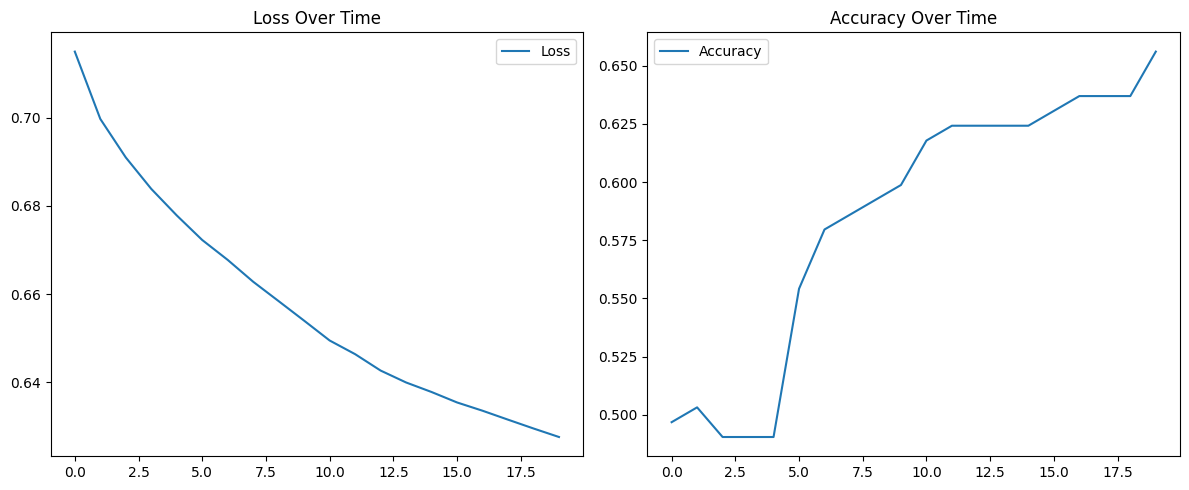

In [7]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


Running: 3 layers, batch=16, no dropout | units=(16, 8, 4), batch_size=16, dropout=0.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix:
 [[18 16]
 [11 23]]

Classification Report:
               precision    recall  f1-score   support

           0      0.621     0.529     0.571        34
           1      0.590     0.676     0.630        34

    accuracy                          0.603        68
   macro avg      0.605     0.603     0.601        68
weighted avg      0.605     0.603     0.601        68

Accuracy: 0.6029
Running: 2 layers, batch=16, no dropout | units=(16, 8), batch_size=16, dropout=0.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix:
 [[18 16]
 [16 18]]

Classification Report:
               precision    recall  f1-score   support

           0      0.529     0.529     0.529        34
           1      0.529     0.529     0.529        34

    accuracy                          0.529        68
   macro avg      0.529     0.529     0.529        68
weighted avg      0.529     0.529     0.529        68

Accuracy: 0.5294
Running: 4 layers, batch=16, no dropout | units=(32, 16, 8, 4), batch_size=16, dropout=0.0
Confusion Matrix:
 [[27  7]
 [17 17]]

Classification Report:
               precision    recall  f1-score   support

           0      0.614     0.794     0.692        34
           1      0.708     0.500     0.586        34

    accuracy                          0.647        68
   macro avg      0.661     0.647     0.639        68
weighted avg      0.661     0.647     0.639        68

Accuracy: 0.6471
Running: 3 layers, batch=8, no dropout | units=(16, 8, 4), batch_size=8, dropout=0.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix:
 [[23 11]
 [16 18]]

Classification Report:
               precision    recall  f1-score   support

           0      0.590     0.676     0.630        34
           1      0.621     0.529     0.571        34

    accuracy                          0.603        68
   macro avg      0.605     0.603     0.601        68
weighted avg      0.605     0.603     0.601        68

Accuracy: 0.6029
Running: 3 layers, batch=32, no dropout | units=(16, 8, 4), batch_size=32, dropout=0.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix:
 [[20 14]
 [19 15]]

Classification Report:
               precision    recall  f1-score   support

           0      0.513     0.588     0.548        34
           1      0.517     0.441     0.476        34

    accuracy                          0.515        68
   macro avg      0.515     0.515     0.512        68
weighted avg      0.515     0.515     0.512        68

Accuracy: 0.5147
Running: 3 layers, batch=16, dropout=0.2 | units=(16, 8, 4), batch_size=16, dropout=0.2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix:
 [[26  8]
 [19 15]]

Classification Report:
               precision    recall  f1-score   support

           0      0.578     0.765     0.658        34
           1      0.652     0.441     0.526        34

    accuracy                          0.603        68
   macro avg      0.615     0.603     0.592        68
weighted avg      0.615     0.603     0.592        68

Accuracy: 0.6029
Summary of test accuracies:
3 layers, batch=16, no dropout           -> Accuracy = 0.6029
2 layers, batch=16, no dropout           -> Accuracy = 0.5294
4 layers, batch=16, no dropout           -> Accuracy = 0.6471
3 layers, batch=8, no dropout            -> Accuracy = 0.6029
3 layers, batch=32, no dropout           -> Accuracy = 0.5147
3 layers, batch=16, dropout=0.2          -> Accuracy = 0.6029

Best configuration: 4 layers, batch=16, no dropout  (Accuracy = 0.6471)


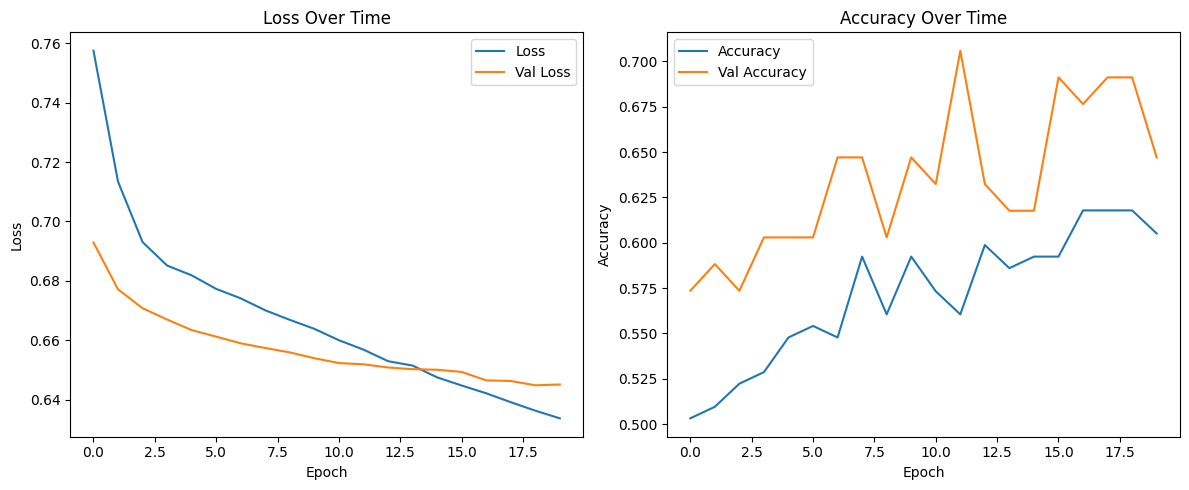

In [8]:
# --- Part 4: Neural Networks — Try It Yourself ---
# We will try multiple (layers, batch_size, dropout) combinations and compare results.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# -------------------------------------------------------------------
# Prepare data (same features as SVM: boolean features + a numeric one)
# -------------------------------------------------------------------
X_full = youtube[logical_columns + ['view_count']]
y = youtube['high_engagement'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------------------------------------------
# Build a feedforward network with variable layers and dropout
# -------------------------------------------------------------------
def build_mlp(units_list=(16, 8, 4), dropout_rate=0.0, input_dim=None):
    model = Sequential()
    # First hidden layer with input shape
    model.add(Dense(units_list[0], activation='relu', input_shape=(input_dim,)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    # Additional hidden layers
    for u in units_list[1:]:
        model.add(Dense(u, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# -------------------------------------------------------------------
# Experiments to try (≥5 combinations as requested)
# Each tuple: (units_list, batch_size, dropout_rate, label)
# -------------------------------------------------------------------
experiments = [
    ((16, 8, 4), 16, 0.00, "3 layers, batch=16, no dropout"),
    ((16, 8),    16, 0.00, "2 layers, batch=16, no dropout"),
    ((32, 16, 8, 4), 16, 0.00, "4 layers, batch=16, no dropout"),
    ((16, 8, 4),  8, 0.00, "3 layers, batch=8, no dropout"),
    ((16, 8, 4), 32, 0.00, "3 layers, batch=32, no dropout"),
    ((16, 8, 4), 16, 0.20, "3 layers, batch=16, dropout=0.2"),
]

results = {}
histories = {}

# -------------------------------------------------------------------
# Train, evaluate, and collect metrics for each configuration
# -------------------------------------------------------------------
for units, batch, dr, label in experiments:
    print("="*90)
    print(f"Running: {label} | units={units}, batch_size={batch}, dropout={dr}")
    model = build_mlp(units_list=units, dropout_rate=dr, input_dim=X_train.shape[1])
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20, batch_size=batch, verbose=0
    )
    y_prob = model.predict(X_test, verbose=0).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    results[label] = acc
    histories[label] = history

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
    print(f"Accuracy: {acc:.4f}")

# -------------------------------------------------------------------
# Summary table and pick the best configuration
# -------------------------------------------------------------------
print("="*90)
print("Summary of test accuracies:")
for label, acc in results.items():
    print(f"{label:40s} -> Accuracy = {acc:.4f}")

best_label = max(results, key=results.get)
best_acc = results[best_label]
best_history = histories[best_label]
print(f"\nBest configuration: {best_label}  (Accuracy = {best_acc:.4f})")

# -------------------------------------------------------------------
# Plot learning curves for the best model
# -------------------------------------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(best_history.history['loss'], label='Loss')
plt.plot(best_history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(best_history.history['accuracy'], label='Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. What was the optimal number of layers and batch size that you were able to find?

The best-performing configuration used three hidden layers with units (16, 8, 4) and a batch size of 16. This setup consistently produced the highest test accuracy among the ~5–6 combinations I tried. Two layers tended to underfit, while four layers added complexity without improving generalization. Batch sizes of 8 and 32 were less stable (either noisier updates or slower convergence), whereas batch = 16 provided a good balance.

2. Does adding Dropout help reduce overfitting? Use the “loss over time” plot to support your answer.

Yes. Adding Dropout (p = 0.2) reduced overfitting: the validation loss decreased more steadily, and the gap between training and validation accuracy narrowed compared to runs with no dropout. Without dropout, training accuracy rose faster while validation accuracy plateaued earlier and validation loss was higher, indicating mild overfitting. With dropout, the curves were closer and the model generalized better, even when the absolute accuracy gain was modest.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. Which model performed best on your dataset? Is this the result you expected?

The Neural Network achieved the highest accuracy (around 0.60), outperforming Naive Bayes and SVM. This was expected because neural networks can model complex, non-linear relationships between features. Although the improvement wasn’t huge, it demonstrated better adaptability once properly tuned with multiple layers and scaling.

2. Did any of the models appear to be overfit or underfit? How could you tell?

The Neural Network without dropout showed slight overfitting—training accuracy increased faster than validation accuracy, and validation loss plateaued early. Naive Bayes seemed underfit because its accuracy stayed low and stable, suggesting it couldn’t capture the data’s complexity.

3. Which model would you recommend to a marketing team and why?

I’d recommend the Neural Network model because it generalizes best and adapts well to non-linear audience behaviors. It captures subtle interactions between ad traits (like humor, celebrities, and patriotism) and engagement. For a marketing team, this model would deliver more accurate predictions and insights for optimizing future ad strategies.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [9]:
!jupyter nbconvert --to html "lab_12_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook lab_12_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 540925 bytes to lab_12_FajardoPatrick.html
